# Laboratory 3

| Name | Surname | ID Number |
|------|---------|---------------------|
| Andrea | Turci | 2106724 |

In [1]:
library(ggplot2)
library(bayestestR)
library(dplyr)
library(ggplot2)
library(geosphere)
library(spatstat)
library(Hmisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.2-9


Attaching package: ‘spatstat.geom’


The following object is masked from ‘package:geosphere’:

    perimeter


Loading required package: spatstat.random

spatstat.random 3.2-3

Loading required package: spatstat.explore

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


spatstat.explore 3.2-7


Attaching package: ‘spatstat.explore’


The following object is masked from ‘package:bayestestR’:

    auc


Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.2-11

Loading required package: spatstat.linnet

spatstat.linnet 3.1-5


spatstat 3.0-8 
For an introduction to spatst

## Exercise 1: Bayesian Inference for Poisson model

The number of particles emitted by a radioactive source during a fixed interval of time ($\Delta t = 10 s$) follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3.

a) assuming a positive uniform prior distribution for the parameter $\mu$
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R

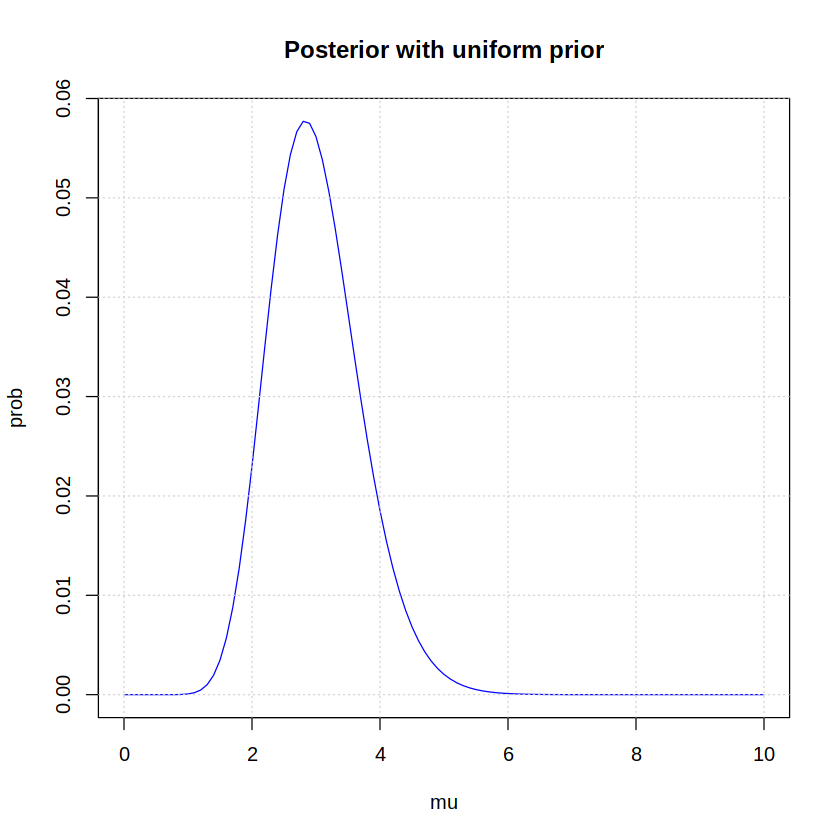

In [2]:
deltat <- 10
occurrencies <- c(4, 1, 3, 1, 5, 3)

m <- seq(0, 10, 0.1)


posterior <- function(data, mu) {
    min_mu <- min(mu)
    max_mu <- max(mu)

    prior <- 1 / (max_mu - min_mu)
    
    n <- length(data)
    sum <- sum(data)

    normalization <- sum(prior * exp(-n * mu) * mu**(sum))
    
    return(prior * exp(-n * mu) * mu**(sum) / normalization)
}

post_data <- posterior(occurrencies, m)
plot(m, post_data, type = "l", col = "blue", xlab = "mu", ylab = "prob", main ="Posterior with uniform prior")
grid()

In [3]:
mean_analytical <- sum(m * post_data)
variance_analytical <- sum((m**2) * post_data) - mean_analytical**2


mean_numerical <- weighted.mean(m, post_data)
median_numerical <- weighted.median(m, post_data)
variance_numerical <- weighted.var(m, post_data)

cat("Analytical Mean:", mean_analytical, "\n")
cat("Analytical Variance:", variance_analytical, "\n \n")

cat("Numerical Mean:", mean_numerical, "\n")
cat("Numerical Median:", median_numerical, "\n")
cat("Numerical Variance:", variance_numerical, "\n")

Analytical Mean: 3 
Analytical Variance: 0.5 
 
Numerical Mean: 3 
Numerical Median: 2.85 
Numerical Variance: 0.5212406 


b) assuming a Gamma prior such that the expected value is $\mu = 3$ with a standard
deviation $\sigma = 1$,
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R.

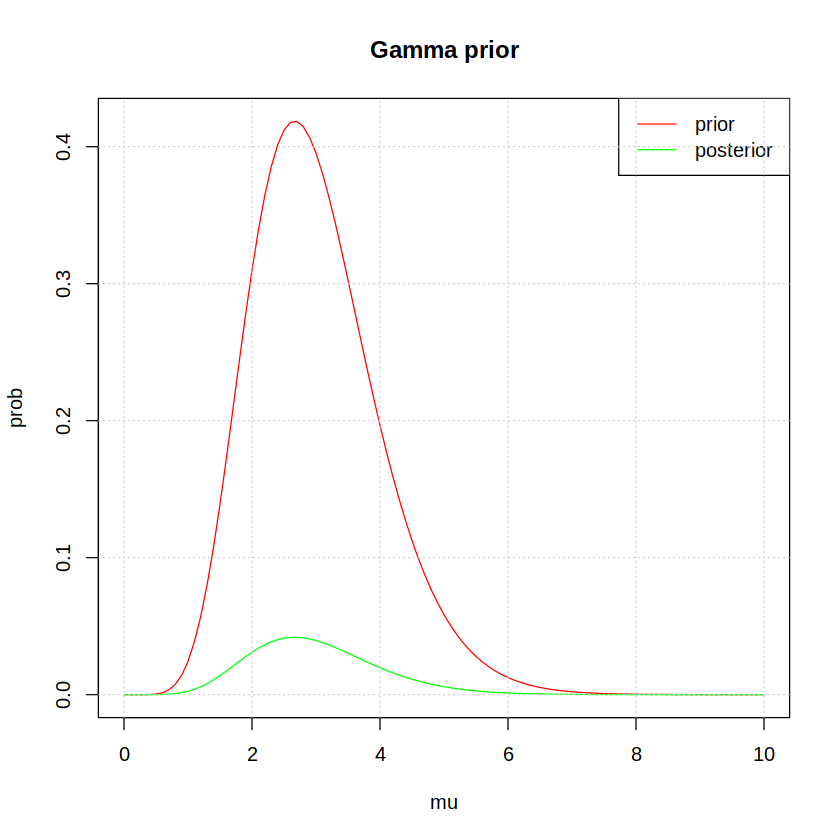

In [4]:
mu <- 3
std <- 1

beta <- mu/(std**2)
alpha <- mu*beta

k <- (mu/std)**2
theta <- std**2 /mu

m <- seq(0, 10, 0.1)
prior <- dgamma(m, shape = k, scale = theta)

posterior <- function(prior, data, mu) {
    n <- length(data)
    sum <- sum(data)

    normalization <- sum(prior * exp(-n * mu) * mu**(sum))
    
    return(prior * exp(-n * mu) * mu**(sum) / normalization)
}

post_data_gamma <- posterior(prior, occurrencies, mu)
plot(m, prior, type="l",col="red", xlab = "mu", ylab = "prob", main = "Gamma prior")
lines(m,post_data_gamma,,col="green")
legend("topright", legend = c("prior", "posterior"),col = c("red", "green"), lty=1)
grid()


In [5]:
mean_analytical <- sum(m * post_data_gamma)
variance_analytical <- sum((m**2) * post_data_gamma) - mean_analytical**2


mean_numerical <- weighted.mean(m, post_data_gamma)
median_numerical <- weighted.median(m, post_data_gamma)
variance_numerical <- weighted.var(m, post_data_gamma)

cat("Analytical Mean:", mean_analytical, "\n")
cat("Analytical Variance:", variance_analytical, "\n \n")

cat("Numerical Mean:", mean_numerical, "\n")
cat("Numerical Median:", median_numerical, "\n")
cat("Numerical Variance:", variance_numerical, "\n")

Analytical Mean: 2.999986 
Analytical Variance: 0.9998989 
 
Numerical Mean: 2.999986 
Numerical Median: 2.85 
Numerical Variance: 1.030247 


c) evaluate a 95% credibility interval for the results obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

95% credibility interval is ( 1.4475 ; 5.2575 ) 


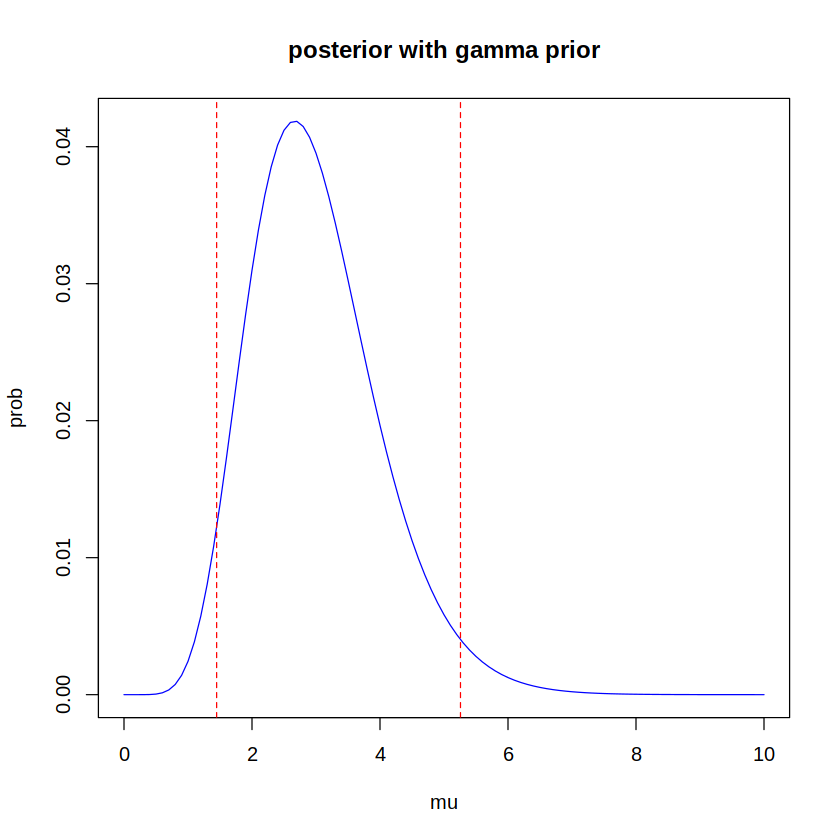

In [6]:
quantiles_gamma <- wtd.quantile(m, post_data_gamma, c(0.025, 0.975), normwt = TRUE)

cat("95% credibility interval is (", quantiles_gamma[1], ";", quantiles_gamma[2], ")", "\n")

plot(m, post_data_gamma, xlab = "mu", ylab = "prob", main ="posterior with gamma prior", col = "blue", type = "l")
abline(v = quantiles_gamma[1], col = "red", lty = 2)
abline(v = quantiles_gamma[2], col = "red", lty = 2)

95% credibility interval is ( 1.8475 ; 4.5525 ) 


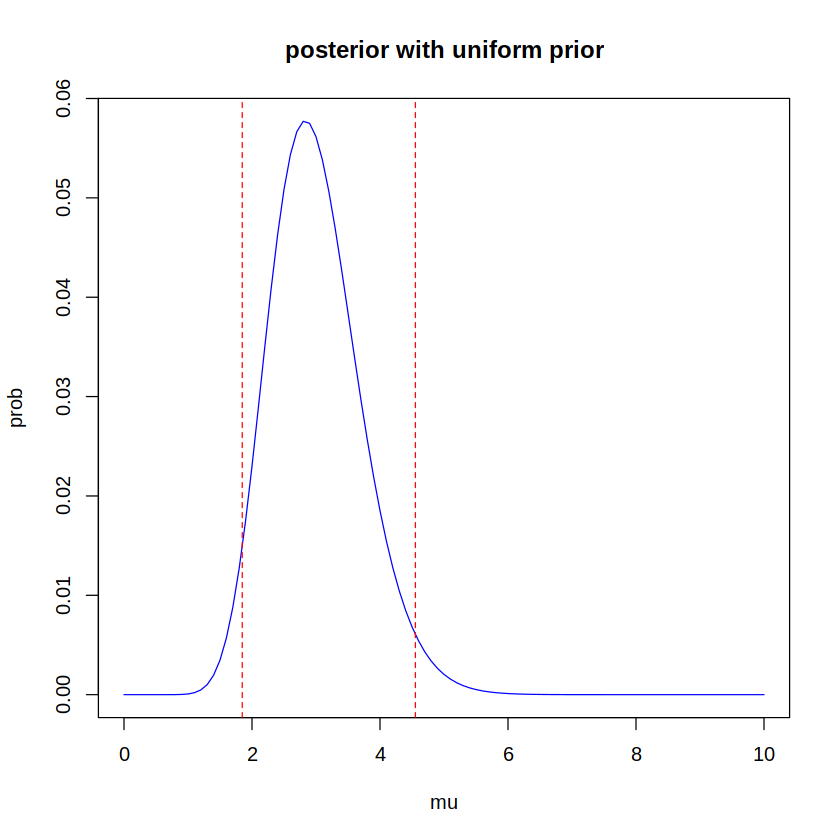

In [7]:
quantiles <- wtd.quantile(m, post_data, c(0.025, 0.975), normwt = TRUE)

cat("95% credibility interval is (", quantiles[1], ";", quantiles[2], ")", "\n")

plot(m, post_data, xlab = "mu", ylab = "prob", main ="posterior with uniform prior", col = "blue", type = "l")
abline(v = quantiles[1], col = "red", lty = 2)
abline(v = quantiles[2], col = "red", lty = 2)

## Exercise 2: Efficiency using Bayesian approach


A researcher A wants to evaluate the efficiency of detector 2 (Det2). For this purpose, he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1 and Det3. Let n be the number of signals recorded simultaneously by Det1 and Det3, and r be those also recorded by Det2, researcher A obtains $n = 500$ and $r = 312$.

Assuming a binomial model where n is the number of trials and r is the number of success out of n trials,

a) Evaluate the mean and the variance using a Bayesian approach under the hypothesis of:

- uniform prior ∼ U(0, 1)
- Jeffrey’s prior ∼ Beta(1/2, 1/2)

b) Plot the posterior distributions for both cases

Using the uniform prior

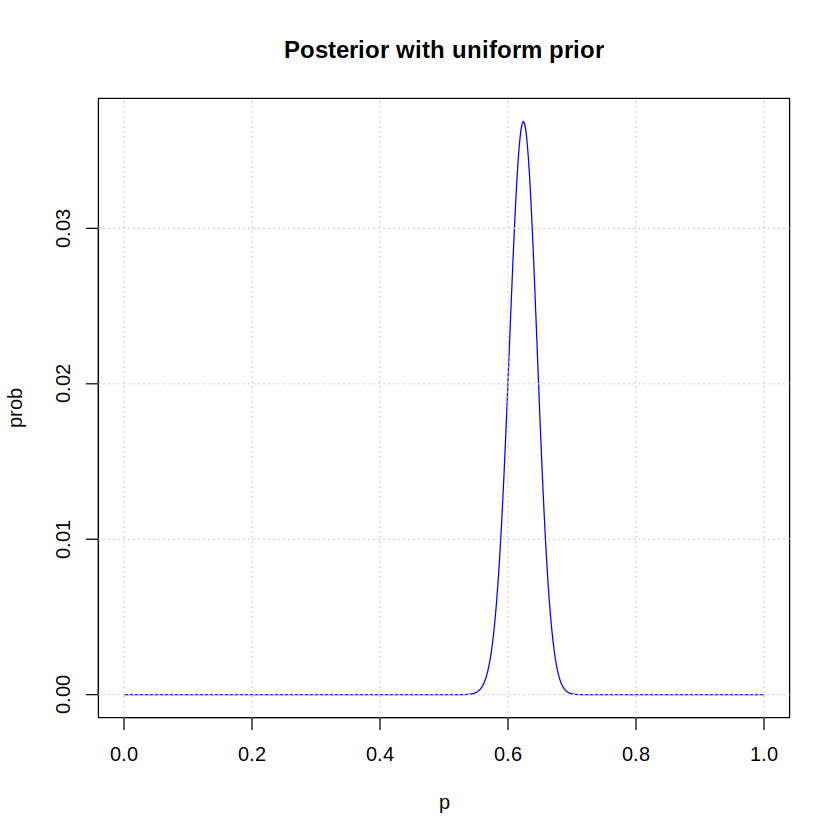

In [8]:
n <- 500
r <- 312
p <- seq(0, 1, 0.002)
binom <- dbinom(x=r, size=n, prob=p)

norm <- sum(binom)

posterior_uniform <- binom /norm

plot(p, posterior_uniform, type = "l", col = "blue", xlab = "p", ylab = "prob", main = "Posterior with uniform prior")
grid()


In [9]:
mean_analytical <- sum(p * posterior_uniform)
variance_analytical <- sum((p**2) * posterior_uniform) - mean_analytical**2

cat("the mean is", mean_analytical, '\n')
cat("the variance is", variance_analytical)


the mean is 0.623506 


the variance is 0.0004666924

Using the Jeffrey's prior

Using a $Beta(1/2, 1/2)$ prior, and with a poissonian likelihood we know that the posterior is a $Beta(\alpha + r, \beta + n -r)$, so we end up having 
$Beta(1/2 + 312, \beta + 500 - 312)$

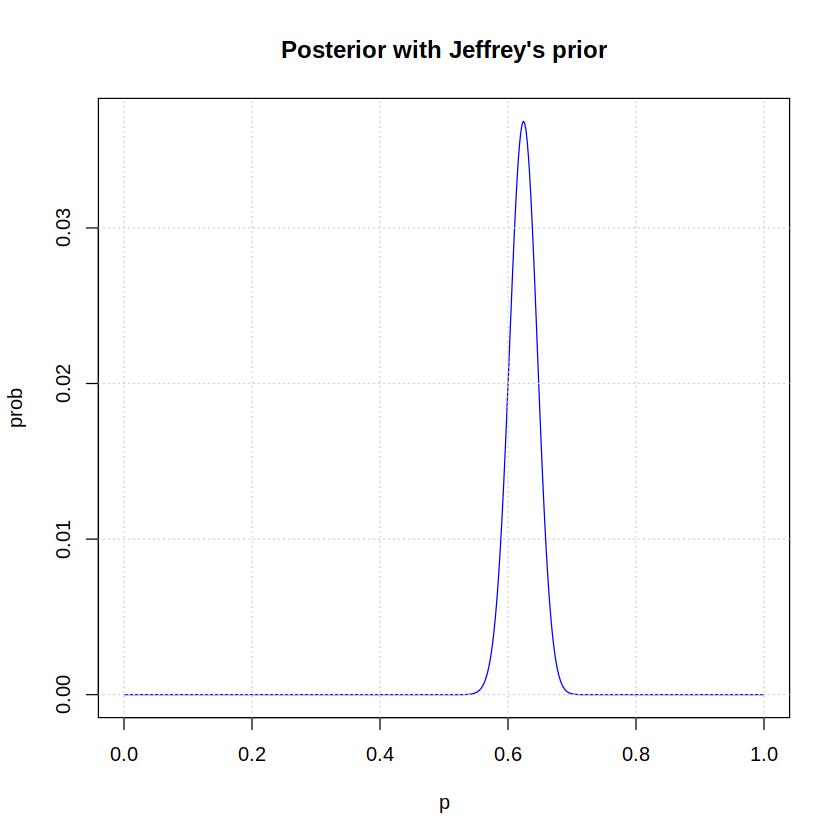

In [10]:
alpha <- 1/2 + r
beta <- 1/2 + n - r

beta <- dbeta(p, alpha , beta)

beta_post <- beta/sum(beta)

plot(p, beta_post, type = "l", col = "blue", xlab = "p", ylab = "prob", main = "Posterior with Jeffrey's prior")
grid()

In [11]:
mean_analytical <- sum(p * beta_post)
variance_analytical <- sum((p**2) * beta_post) - mean_analytical**2

cat("the mean is", mean_analytical, '\n')
cat("the variance is", variance_analytical)


the mean is 0.6237525 


the variance is 0.0004675006

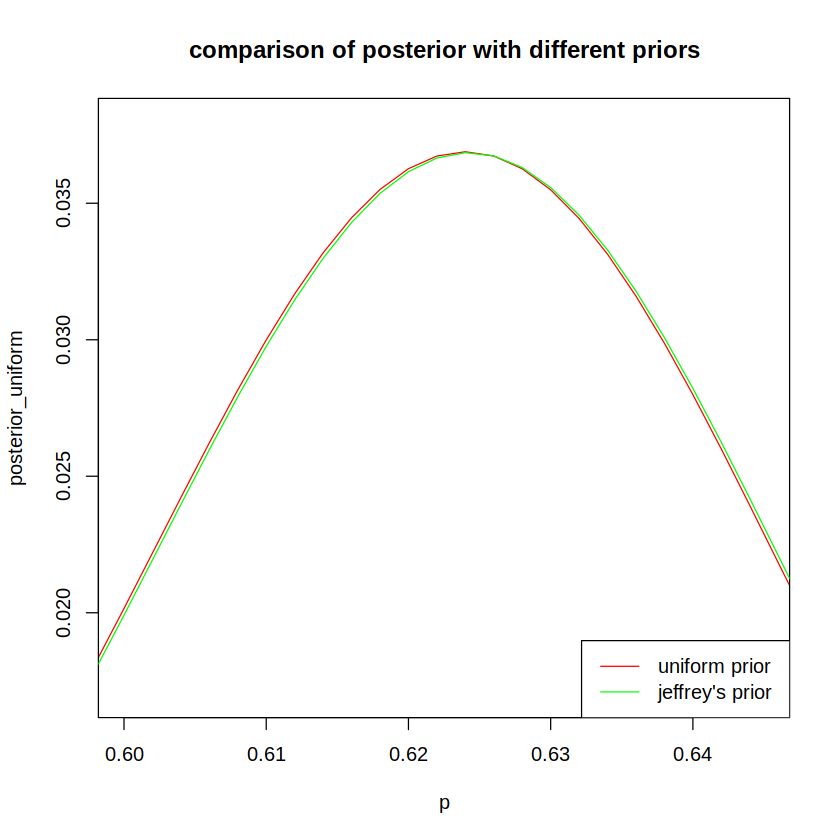

In [12]:
plot(p, posterior_uniform, type = "l", col="red", main = "comparison of posterior with different priors", xlim = c(0.6, 0.645), ylim = c(0.017, 0.038))
lines(p, beta_post,  type = "l", col="green")
legend("bottomright", legend = c("uniform prior", "jeffrey's prior"), col = c("red", "green"), lty = 1)

Taking into account that the same detector has been studied by researcher B, who has performed only $n = 10$ measurements and has obtained $r = 10$ signals,

c) Evaluate the mean, the variance and the posterior distribution using a uniform prior
with the results of researcher B.

the mean is 0.91758 
the variance is 0.005887501

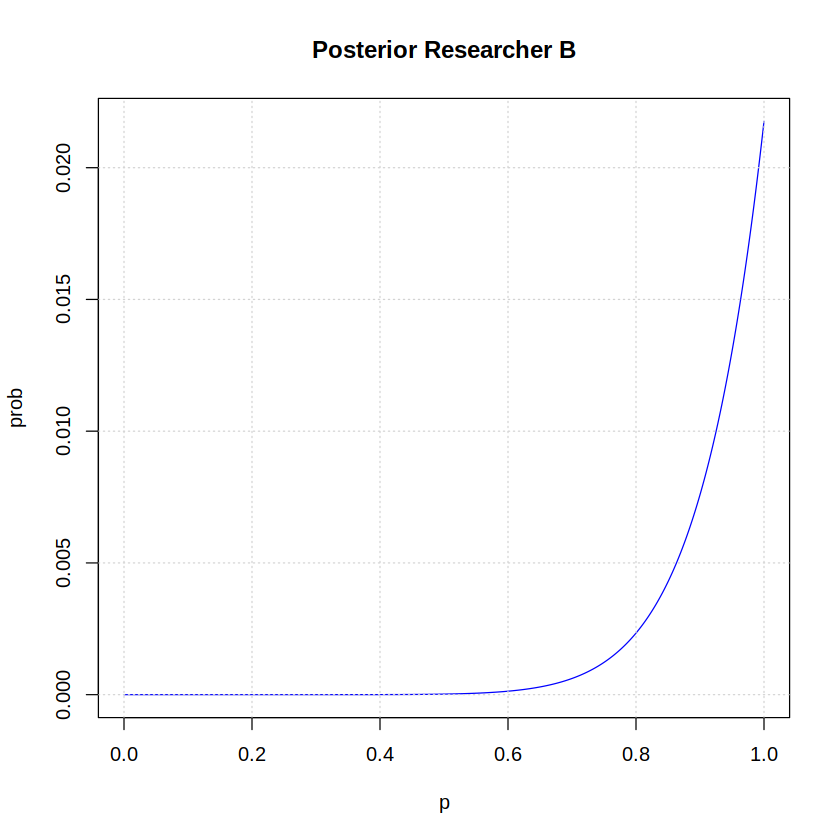

In [13]:
n <- 10
r <- 10
p <- seq(0, 1, 0.002)
binom_B <- dbinom(x=r, size=n, prob=p)

norm_B <- sum(binom_B)

posterior_resB <- binom_B /norm_B

plot(p, posterior_resB, type = "l", col = "blue", xlab = "p", ylab = "prob", main = "Posterior Researcher B")
grid()

mean_analytical <- sum(p * posterior_resB)
variance_analytical <- sum((p**2) * posterior_resB) - mean_analytical**2

cat("the mean is", mean_analytical, '\n')
cat("the variance is", variance_analytical)

Let's rewrite the binomial as a beta function, knowing that 

$
\alpha - 1 = 10$ and $\beta - 1 = 0$ 
, thus

$\alpha = 11$ and $\beta = 1
$

Using a $Beta(11, 1)$ prior, and with a poissonian likelihood we know that the posterior is a $Beta(\alpha + r, \beta + n -r)$, so we end up having 
$Beta(11 + 312, 1 + 500 - 312)$

the mean is 0.6308594 
the variance is 0.000453949

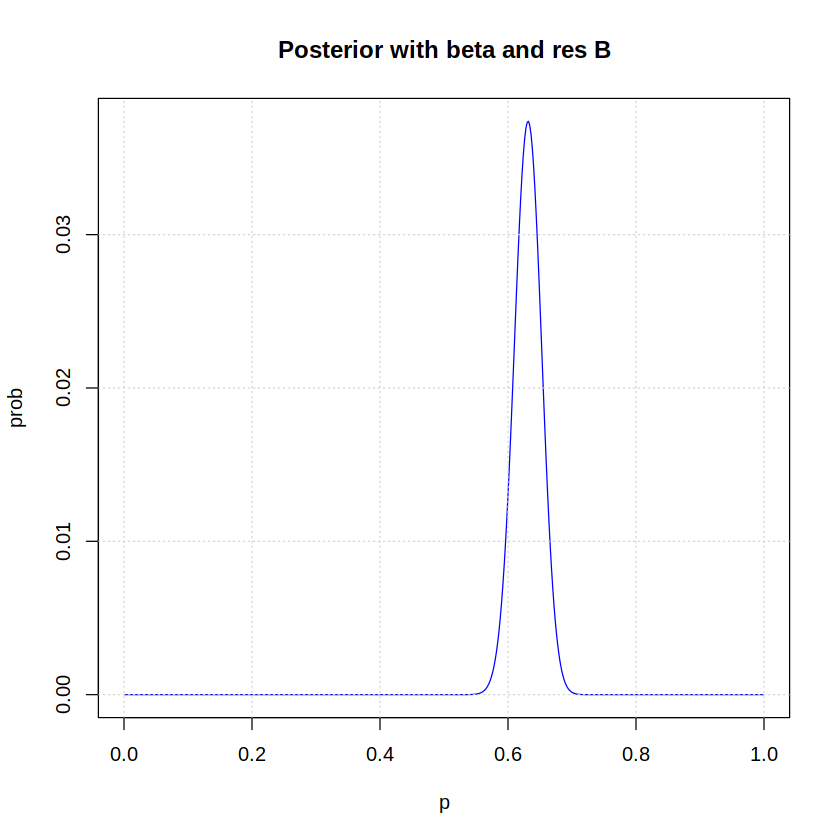

In [14]:
n <- 500
r <- 312

alpha <- 11 + r
beta <- 1 + n - r

beta_function <- dbeta(p, alpha , beta)

posterior_beta <- beta_function/sum(beta_function)

plot(p, posterior_beta, type = "l", col = "blue", xlab = "p", ylab = "prob", main = "Posterior with beta and res B")
grid()

mean_analytical <- sum(p * posterior_beta)
variance_analytical <- sum((p**2) * posterior_beta) - mean_analytical**2

cat("the mean is", mean_analytical, '\n')
cat("the variance is", variance_analytical)

e) [Optional] Compute 95% credible interval using the posterior of the previous point

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


95% credibility interval is ( 0.59 ; 0.672 ) 


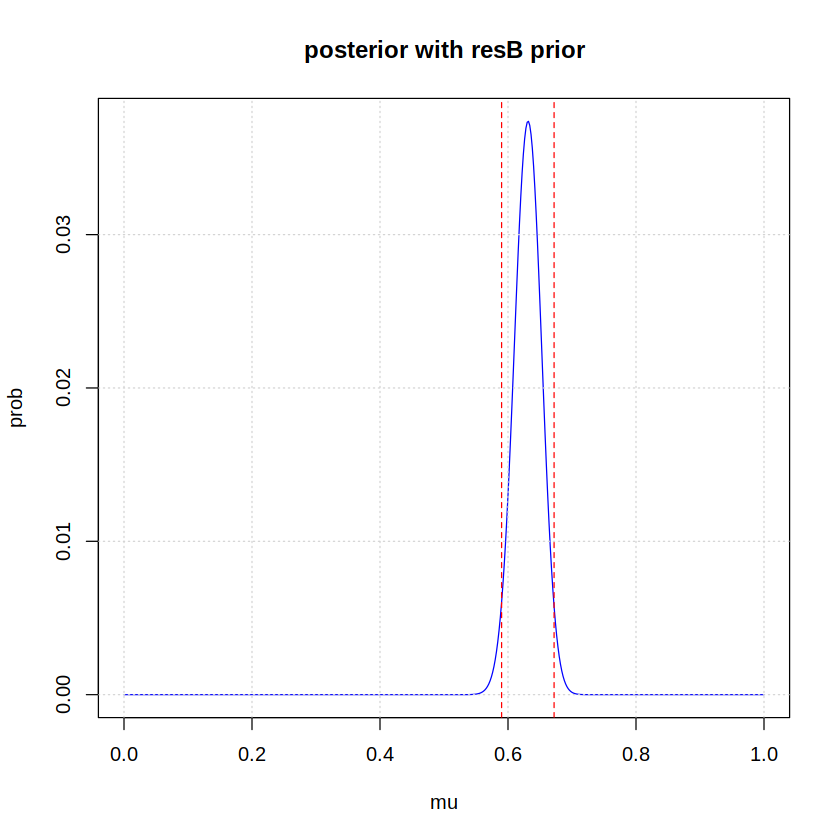

In [15]:
quantiles <- wtd.quantile(p, posterior_beta, c(0.025, 0.975), normwt = TRUE)

cat("95% credibility interval is (", quantiles[1], ";", quantiles[2], ")", "\n")

plot(p, posterior_beta, xlab = "mu", ylab = "prob", main ="posterior with resB prior", col = "blue", type = "l")
grid()
abline(v = quantiles[1], col = "red", lty = 2)
abline(v = quantiles[2], col = "red", lty = 2)

Comparison of the posterior with and without (taking Jeffrey's prior) researcher B.

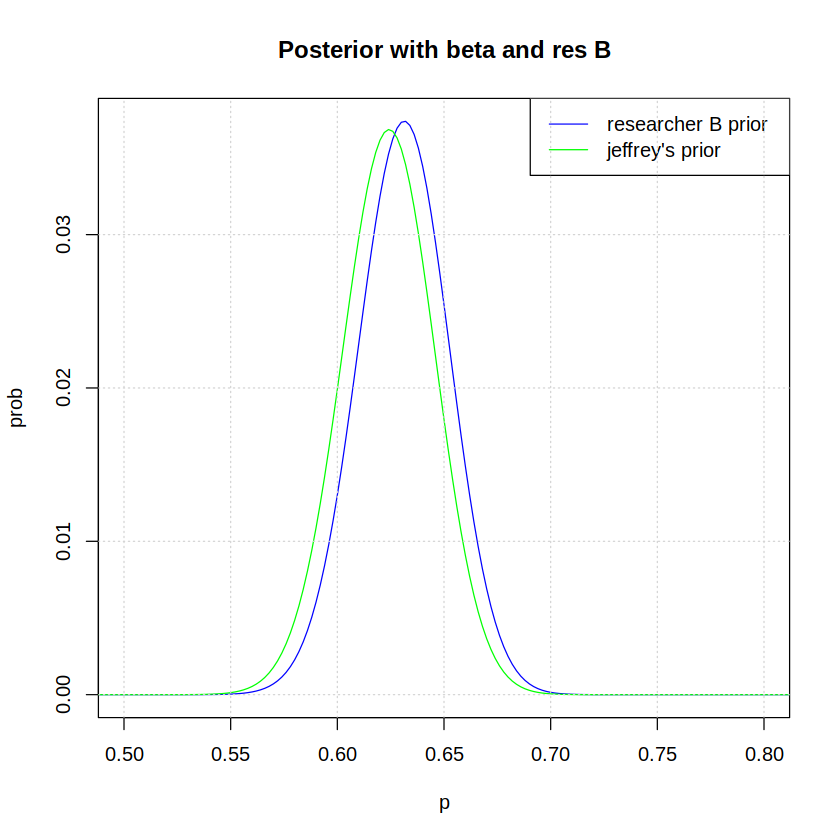

In [16]:
plot(p, posterior_beta, type = "l", col = "blue", xlab = "p", ylab = "prob", main = "Posterior with beta and res B", xlim = c(0.5, 0.8))
lines(p, beta_post,  type = "l", col="green")
legend("topright", legend = c("researcher B prior", "jeffrey's prior"), col = c("blue", "green"), lty = 1)
grid()

## Exercise 3 - Bayesian Inference for Binomial model

A coin is flipped n = 30 times with the following outcomes:

T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H,
T, H, T, H, H, H

a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior
distributions for the data set.

I considered "Tail" as the success event

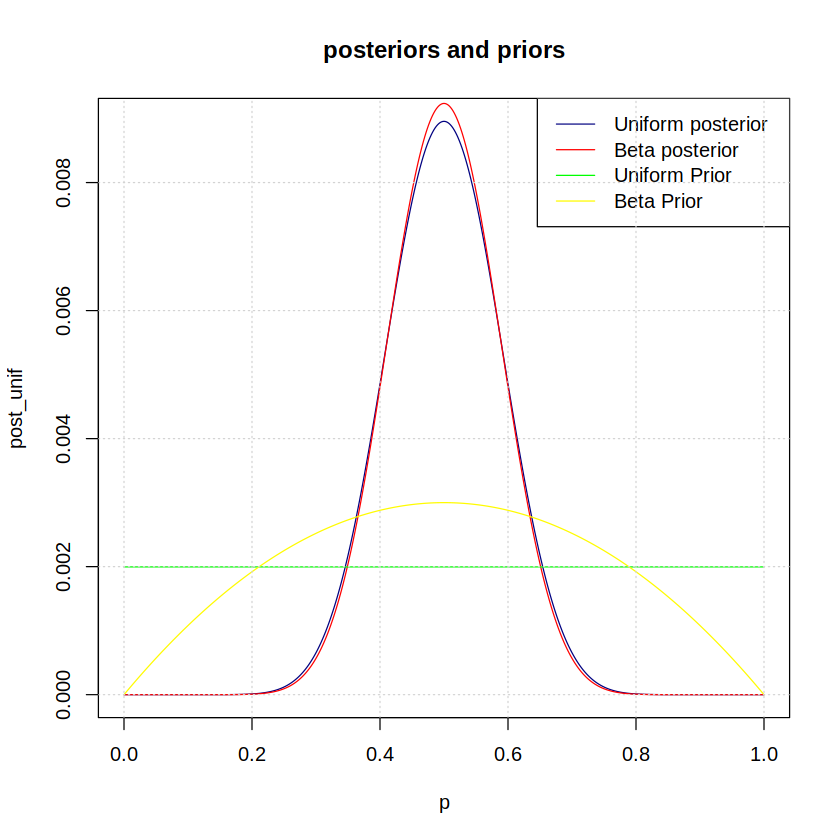

In [17]:
n <- 30
r <- 15
p <- seq(0, 1, 0.002)
likelihood <- dbinom(x=r, size=n, prob=p)

#with uniform
uniform_prior = replicate(length(p), 1 / length(p))
normalization <- sum(likelihood)
post_unif <- likelihood / normalization

#beta prior
alpha <- 2
beta <- 2
beta_prior <- dbeta(p, alpha, beta)
beta_prior <- beta_prior / sum(beta_prior)
post_beta <- dbeta(p, alpha + r, beta + n - r)

post_beta <- post_beta / sum(post_beta)

plot(p, post_unif,type = "l", col='navy', main = "posteriors and priors")
lines(p, post_beta, type = "l", col='red')
lines(p, uniform_prior, type = "l", col='green')
lines(p, beta_prior, type = "l", col='#fffb00')
legend("topright", legend=c("Uniform posterior", "Beta posterior", "Uniform Prior", "Beta Prior"), col=c("navy", "red", "green", '#fffb00'), lty=1)
grid()

b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [18]:
#post_unif e post_beta sono le posterior

#for uniform
max_unif_post <- which.max(post_unif)
prob_value <- p[max_unif_post]

interval_unif <- wtd.quantile(p, post_unif, c(0.025,0.975), normwt = TRUE)

cat("the most probable value of p using the uniform prior is", prob_value, "\n")
cat("95% credibility interval using the uniform prior is (", interval_unif[1], ";", interval_unif[2], ")", "\n")

#for beta
max_beta_post <- which.max(post_beta)
prob_value <- p[max_beta_post]

interval_beta <- wtd.quantile(p, post_beta, c(0.025,0.975), normwt = TRUE)

cat("the most probable value of p using the beta prior is", prob_value, "\n")
cat("95% credibility interval using the beta prior is (", interval_beta[1], ";", interval_beta[2], ")", "\n")

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


the most probable value of p using the uniform prior is 0.5 
95% credibility interval using the uniform prior is ( 0.3329 ; 0.6691 ) 


Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


the most probable value of p using the beta prior is 0.5 
95% credibility interval using the beta prior is ( 0.3378 ; 0.6651 ) 


c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

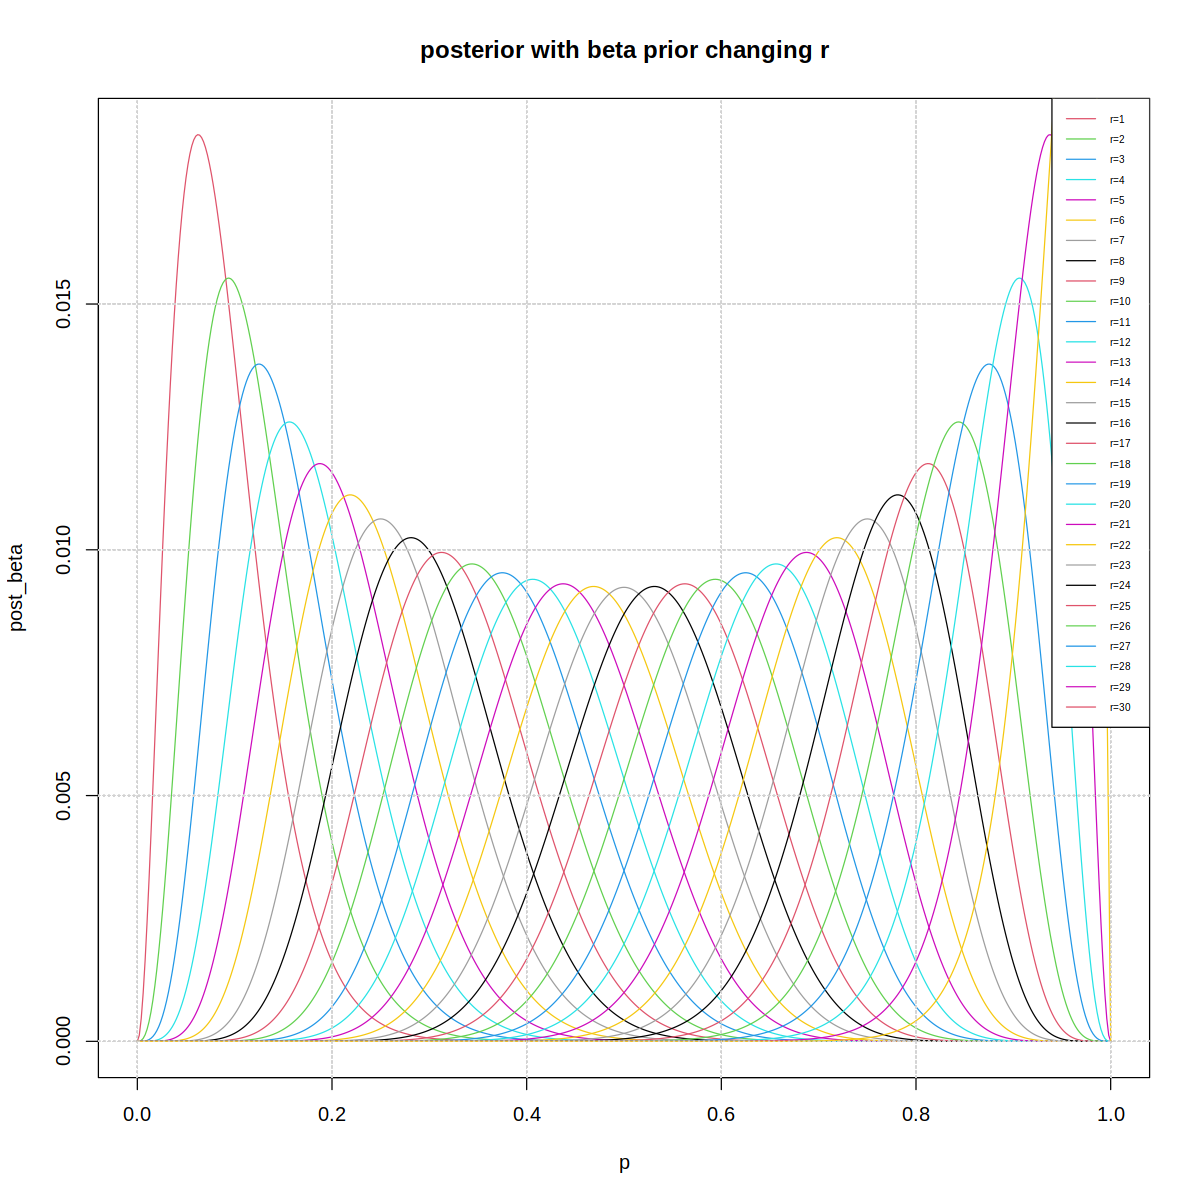

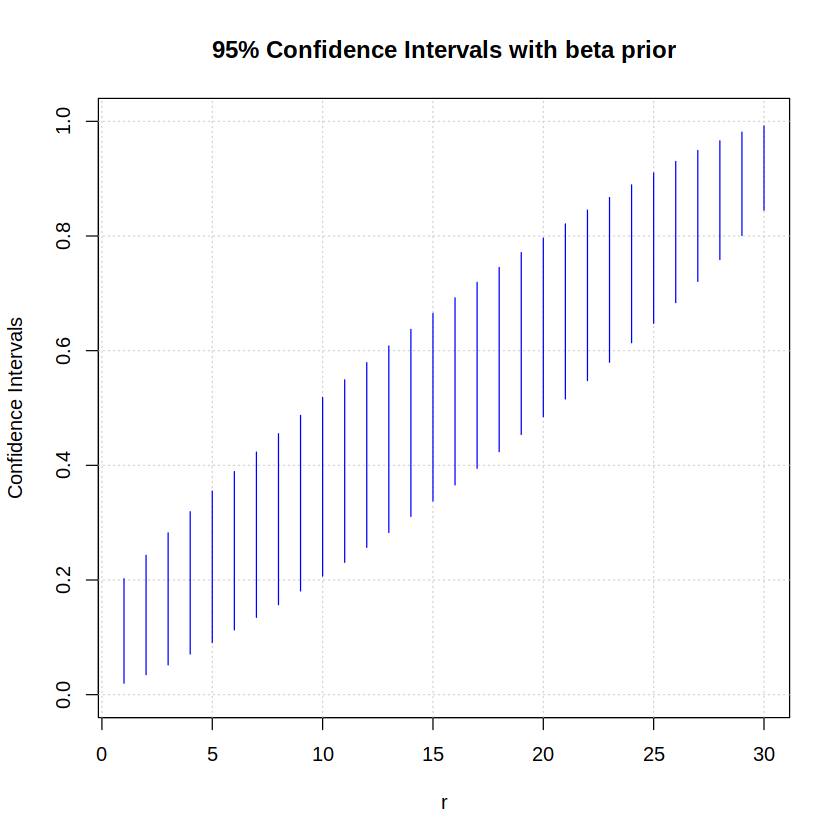

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

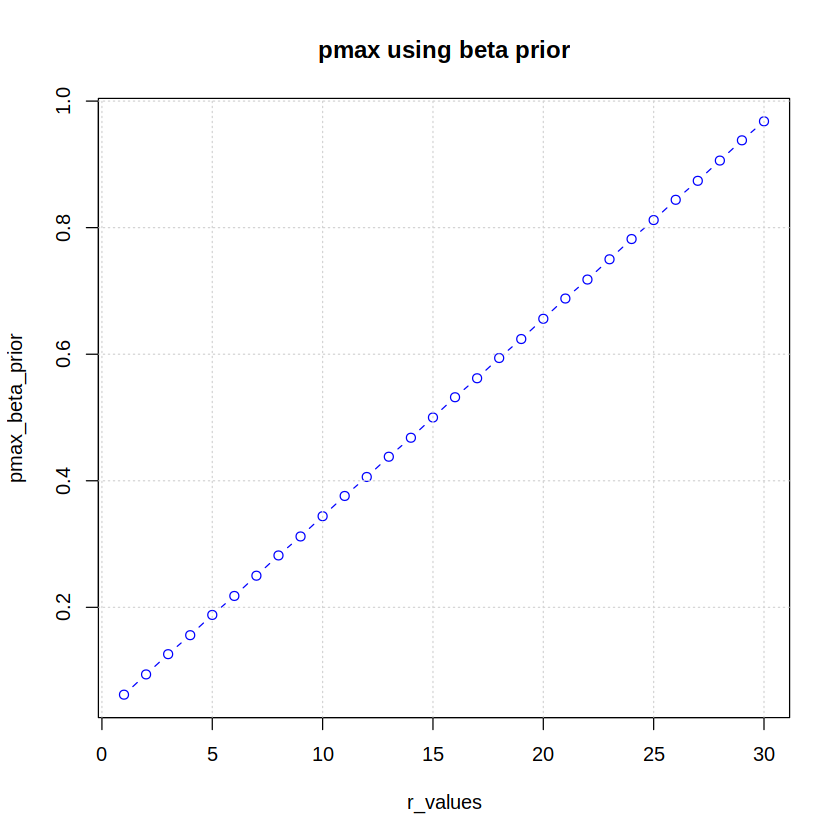

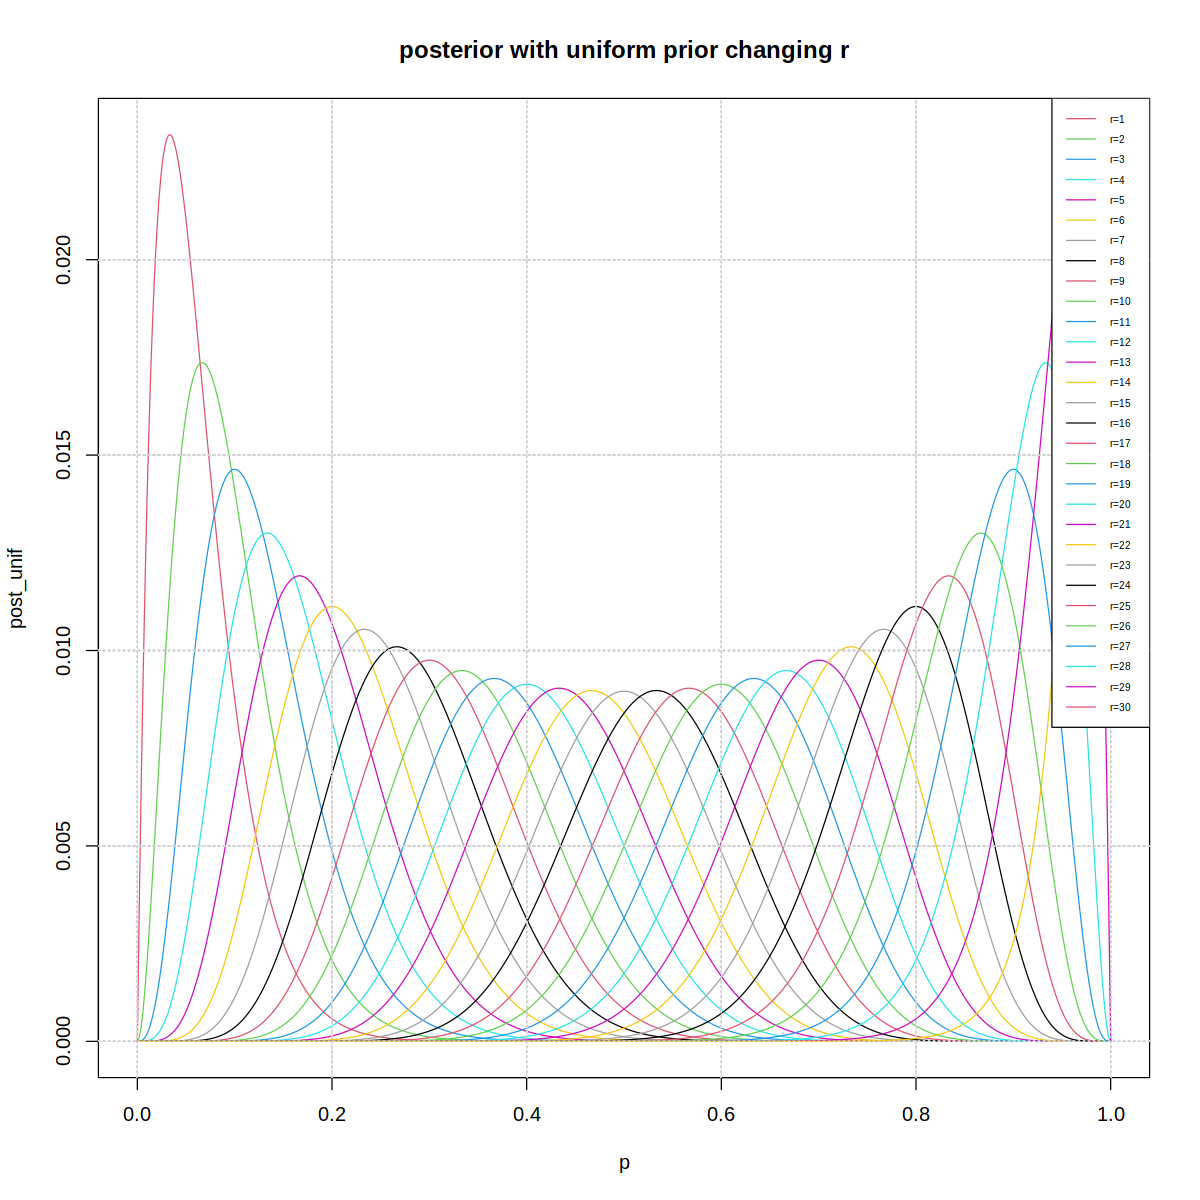

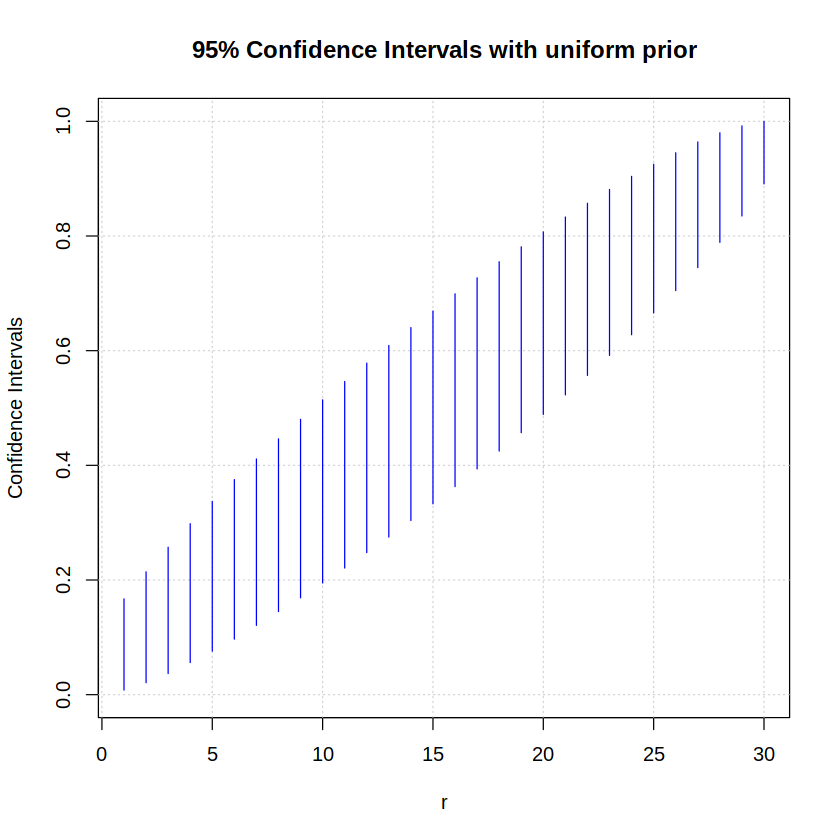

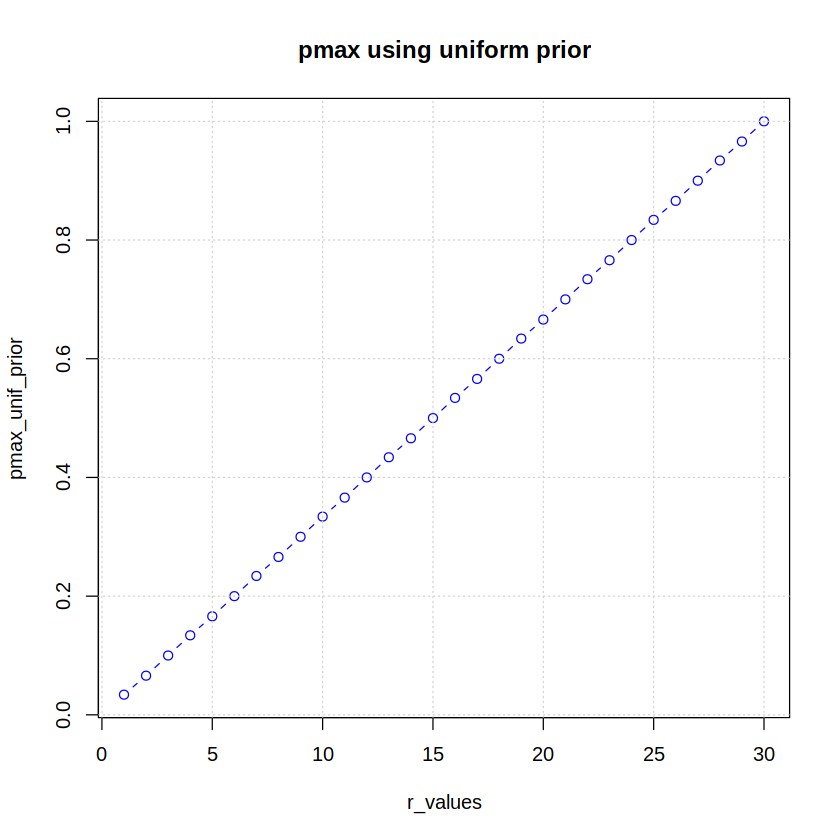

In [19]:
r_values <- seq(1,30, 1)

pmax_beta_prior <- list()
cred_intervs_beta <- list()

options(repr.plot.width=10, repr.plot.height=10) 

#FOR BETA PRIOR ONLY
for (r in r_values) {
    likelihood <- dbinom(x=r, size=n, prob=p)

    #beta prior
    alpha <- 2
    beta <- 2
    beta_prior <- dbeta(p, alpha, beta)
    beta_prior <- beta_prior / sum(beta_prior)
    post_beta <- dbeta(p, alpha + r, beta + n - r)

    post_beta <- post_beta / sum(post_beta)

    max_beta_post <- which.max(post_beta)
    prob_value <- p[max_beta_post]

    pmax_beta_prior <- append(pmax_beta_prior, prob_value)

    quantiles_beta = wtd.quantile(p, post_beta, c(0.025, 0.975), normwt = TRUE)
    cred_intervs_beta <- append(cred_intervs_beta, list(c(quantiles_beta[1], quantiles_beta[2])))
    

    if (r == 1) {
        plot(p,post_beta, type ='l', col = 2, main = "posterior with beta prior changing r")
    } else {
        lines(p, post_beta, type = 'l', col = r +1)
        grid()
    }

}

legend("topright", cex = 0.5, legend = c("r=1","r=2","r=3","r=4","r=5","r=6","r=7","r=8","r=9","r=10","r=11","r=12","r=13","r=14","r=15","r=16","r=17","r=18","r=19","r=20","r=21","r=22","r=23","r=24","r=25","r=26","r=27","r=28","r=29","r=30"), col=2:30,lty=1)

options(repr.plot.width=7, repr.plot.height=7) 

plot(r_values, type = "n", ylim = c(0,1), xlab = "r", ylab = "Confidence Intervals", main = "95% Confidence Intervals with beta prior")
grid()

# Disegna i segmenti verticali per gli intervalli di confidenza
for (i in 1:length(r_values)) {
  interval <- cred_intervs_beta[[i]]
  segments(r_values[i], interval[1], r_values[i], interval[2], col = "blue")
}

plot(r_values, pmax_beta_prior, type = "b", col = "blue", main = "pmax using beta prior")
grid()
options(repr.plot.width=10, repr.plot.height=10) 

#FOR UNIFORM PRIOR ONLY
pmax_unif_prior <- list()
cred_intervs_unif <- list()

#FOR BETA PRIOR ONLY
for (r in r_values) {
    likelihood <- dbinom(x=r, size=n, prob=p)

    #with uniform
    uniform_prior = replicate(length(p), 1 / length(p))
    normalization <- sum(likelihood)
    post_unif <- likelihood / normalization

    max_unif_post <- which.max(post_unif)
    prob_value <- p[max_unif_post]

    pmax_unif_prior <- append(pmax_unif_prior, prob_value)

    quantiles_unif = wtd.quantile(p, post_unif, c(0.025, 0.975), normwt = TRUE)
    cred_intervs_unif <- append(cred_intervs_unif, list(c(quantiles_unif[1], quantiles_unif[2])))
    

    if (r == 1) {
        plot(p,post_unif, type ='l', col = 2, main = "posterior with uniform prior changing r")
    } else {
        lines(p, post_unif, type = 'l', col = r +1)
        grid()
    }

}

legend("topright", cex = 0.5, legend = c("r=1","r=2","r=3","r=4","r=5","r=6","r=7","r=8","r=9","r=10","r=11","r=12","r=13","r=14","r=15","r=16","r=17","r=18","r=19","r=20","r=21","r=22","r=23","r=24","r=25","r=26","r=27","r=28","r=29","r=30"), col=2:30,lty=1)

options(repr.plot.width=7, repr.plot.height=7) 

plot(r_values, type = "n", ylim = c(0,1), xlab = "r", ylab = "Confidence Intervals", main = "95% Confidence Intervals with uniform prior")
grid()

# Disegna i segmenti verticali per gli intervalli di confidenza
for (i in 1:length(r_values)) {
  interval <- cred_intervs_unif[[i]]
  segments(r_values[i], interval[1], r_values[i], interval[2], col = "blue")
}

plot(r_values, pmax_unif_prior, type = "b", col = "blue", main = "pmax using uniform prior")
grid()


## Exercise 4 - Poll

A couple of days before an election in which four parties (A,B,C,D) compete, a poll is taken using a sample of 200 voters who express the following preferences 57, 31,45 and 67 for, respectively, parties A,B,C and D.

Using a Bayesian approach, for all parties

a) Calculate the expected percentage of votes and a 68% credibility interval by assuming as prior a
- uniform prior
- a prior constructed from the results obtained from another poll conducted the previous week on a sample of 100 voters who expressed the following preferences 32,14,26,28 for, respectively, parties A,B,C and D.

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


Expected percentage of votes for party A with uniform prior: 28.71%, with 68% credibility interval: (26.00%, 32.00%)
Expected percentage of votes for party B with uniform prior: 15.84%, with 68% credibility interval: (13.00%, 18.00%)
Expected percentage of votes for party C with uniform prior: 22.77%, with 68% credibility interval: (20.00%, 26.00%)
Expected percentage of votes for party D with uniform prior: 33.66%, with 68% credibility interval: (30.68%, 37.00%)


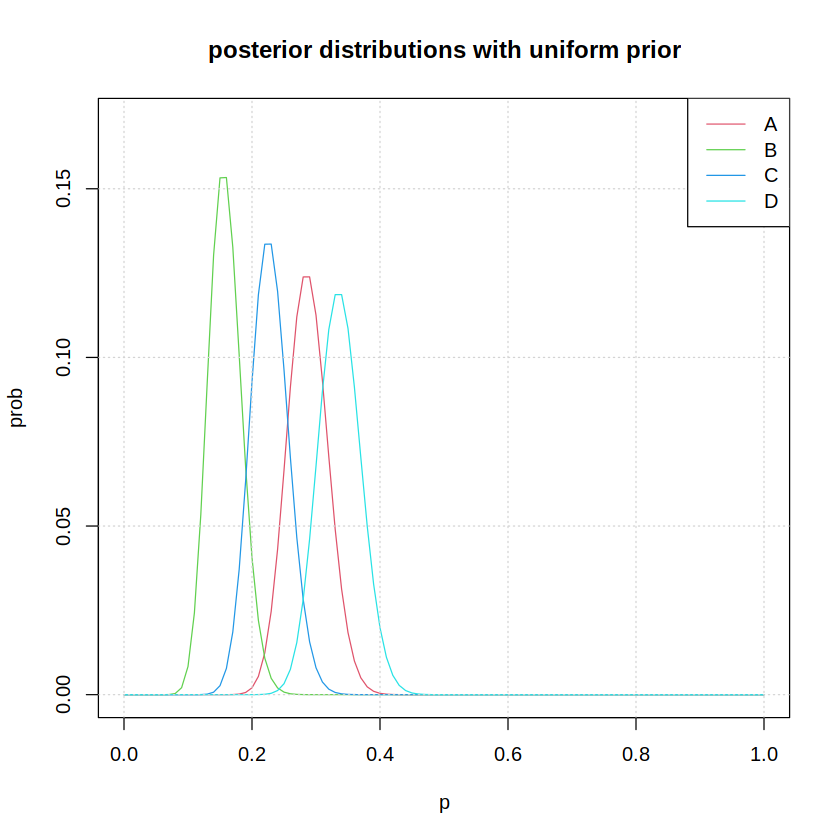

In [26]:
n <- 200
A <- 57
B <- 31
C <- 45
D <- 67 

p <- seq(0, 1, 0.01)

posterior_unif <- function(r, n, p) {
    prior <- replicate(length(p), 1 / length(p))
    likelihood <- dbinom(x=r, size=n, prob=p)
    normalization <- sum(prior*likelihood)

    posterior <- (prior * likelihood) / normalization
    return (posterior)
}

A_post_unif <- posterior_unif(A, n, p)
B_post_unif <- posterior_unif(B, n, p)
C_post_unif <- posterior_unif(C, n, p)
D_post_unif <- posterior_unif(D, n, p)

plot(p, A_post_unif, type = 'l', col = 2, xlab = "p", ylab = "prob", ylim = c(0,0.17), main = "posterior distributions with uniform prior")
lines(p, B_post_unif, type = 'l', col = 3)
lines(p, C_post_unif, type = 'l', col = 4)
lines(p, D_post_unif, type = 'l', col = 5)
grid()

legend("topright", legend=c("A", "B", "C", "D"), col=2:5, lty=1)

mean_A_uniform = wtd.mean(p, A_post_unif, normwt = TRUE)
interval_A_uniform = wtd.quantile(p, A_post_unif, c(0.16, 0.84), normwt = TRUE)

mean_B_uniform = wtd.mean(p, B_post_unif, normwt = TRUE)
interval_B_uniform = wtd.quantile(p, B_post_unif, c(0.16, 0.84), normwt = TRUE)

mean_C_uniform = wtd.mean(p, C_post_unif, normwt = TRUE)
interval_C_uniform = wtd.quantile(p, C_post_unif, c(0.16, 0.84), normwt = TRUE)

mean_D_uniform = wtd.mean(p, D_post_unif, normwt = TRUE)
interval_D_uniform = wtd.quantile(p, D_post_unif, c(0.16, 0.84), normwt = TRUE)


cat(sprintf("Expected percentage of votes for party A with uniform prior: %.2f%%, with 68%% credibility interval: (%.2f%%, %.2f%%)\n", mean_A_uniform * 100,interval_A_uniform[1] * 100, interval_A_uniform[2] * 100))
cat(sprintf("Expected percentage of votes for party B with uniform prior: %.2f%%, with 68%% credibility interval: (%.2f%%, %.2f%%)\n", mean_B_uniform * 100,interval_B_uniform[1] * 100, interval_B_uniform[2] * 100))
cat(sprintf("Expected percentage of votes for party C with uniform prior: %.2f%%, with 68%% credibility interval: (%.2f%%, %.2f%%)\n", mean_C_uniform * 100,interval_C_uniform[1] * 100, interval_C_uniform[2] * 100))
cat(sprintf("Expected percentage of votes for party D with uniform prior: %.2f%%, with 68%% credibility interval: (%.2f%%, %.2f%%)\n", mean_D_uniform * 100,interval_D_uniform[1] * 100, interval_D_uniform[2] * 100))

Assumptions:

1) The polls from the previous week have been taken with a uniform prior
2) likelihood is still poissonian (n= 100)
3) I get the posterior distribution from the previous week 
4) I use this posterior as a prior for this scenario (now n = 200)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


[1] 0.02781093

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


Expected percentage of votes for party A with uniform prior: 29.80%, with 68% credibility interval: (27.00%, 32.00%)
Expected percentage of votes for party B with uniform prior: 15.23%, with 68% credibility interval: (13.00%, 17.00%)
Expected percentage of votes for party C with uniform prior: 23.84%, with 68% credibility interval: (21.52%, 26.00%)
Expected percentage of votes for party D with uniform prior: 31.79%, with 68% credibility interval: (29.00%, 34.48%)


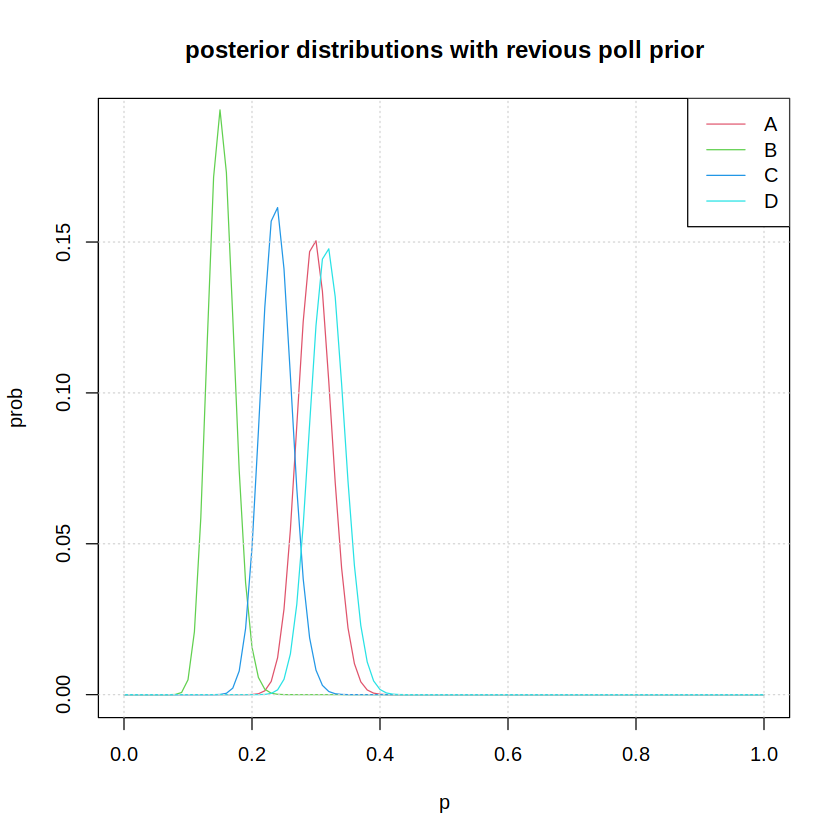

In [27]:
n_prev <- 100
A_prev <- 32
B_prev <- 14
C_prev <- 26
D_prev <- 28

#posterior used as prior 
A_prev_unif <- posterior_unif(A_prev, n_prev, p)
B_prev_unif <- posterior_unif(B_prev, n_prev, p)
C_prev_unif <- posterior_unif(C_prev, n_prev, p)
D_prev_unif <- posterior_unif(D_prev, n_prev, p)

posterior_prev <- function(r, n, p, prior) {
    likelihood <- dbinom(x=r, size=n, prob=p)
    normalization <- sum(prior*likelihood)

    posterior <- (prior * likelihood) / normalization
    return (posterior)
}

A_post_unif <- posterior_prev(A, n, p, A_prev_unif)
B_post_unif <- posterior_prev(B, n, p, B_prev_unif)
C_post_unif <- posterior_prev(C, n, p, C_prev_unif)
D_post_unif <- posterior_prev(D, n, p, D_prev_unif)

plot(p, A_post_unif, type = 'l', xlab = "p", ylab = "prob", main = "posterior distributions with revious poll prior", col = 2, ylim = c(0, 0.19))
lines(p, B_post_unif, type = 'l', col = 3)
lines(p, C_post_unif, type = 'l', col = 4)
lines(p, D_post_unif, type = 'l', col = 5)
grid()

legend("topright", legend=c("A", "B", "C", "D"), col=2:5, lty=1)

mean_A_uniform = wtd.mean(p, A_post_unif, normwt = TRUE)
interval_A_uniform = wtd.quantile(p, A_post_unif, c(0.16, 0.84), normwt = TRUE)

sqrt(wtd.var(p, A_post_unif, normwt = TRUE))

mean_B_uniform = wtd.mean(p, B_post_unif, normwt = TRUE)
interval_B_uniform = wtd.quantile(p, B_post_unif, c(0.16, 0.84), normwt = TRUE)

mean_C_uniform = wtd.mean(p, C_post_unif, normwt = TRUE)
interval_C_uniform = wtd.quantile(p, C_post_unif, c(0.16, 0.84), normwt = TRUE)

mean_D_uniform = wtd.mean(p, D_post_unif, normwt = TRUE)
interval_D_uniform = wtd.quantile(p, D_post_unif, c(0.16, 0.84), normwt = TRUE)


cat(sprintf("Expected percentage of votes for party A with uniform prior: %.2f%%, with 68%% credibility interval: (%.2f%%, %.2f%%)\n", mean_A_uniform * 100,interval_A_uniform[1] * 100, interval_A_uniform[2] * 100))
cat(sprintf("Expected percentage of votes for party B with uniform prior: %.2f%%, with 68%% credibility interval: (%.2f%%, %.2f%%)\n", mean_B_uniform * 100,interval_B_uniform[1] * 100, interval_B_uniform[2] * 100))
cat(sprintf("Expected percentage of votes for party C with uniform prior: %.2f%%, with 68%% credibility interval: (%.2f%%, %.2f%%)\n", mean_C_uniform * 100,interval_C_uniform[1] * 100, interval_C_uniform[2] * 100))
cat(sprintf("Expected percentage of votes for party D with uniform prior: %.2f%%, with 68%% credibility interval: (%.2f%%, %.2f%%)\n", mean_D_uniform * 100,interval_D_uniform[1] * 100, interval_D_uniform[2] * 100))

b) Sample size to obtain a margin of error less or equal than ±3% for each party


$\bar{y} \pm \frac{Z \sigma}{\sqrt{n}} $ and $\frac{Z \sigma}{\sqrt{n} \bar{y}} = 0.03$

So the needed population should be $n = (\frac{Z \sigma}{E \bar{y}}) ^2$ where 

1. $Z$ il the value corresponding to the desidered confidence level, with $qnorm(\lambda)$ with $\lambda = 1 - \alpha /2$ and $\alpha = 0.32$
2. $\sigma$ is the standard deviation, that can be calculated using the formula $\sigma = \sqrt{\frac{p(1-p)}{n}}$
3. $E$ is the error threshold (0.03 in this case)

Thus, 

$
\frac{Z \sqrt{p(1-p)}}{n \bar{y}} = 0.03
$

From which

$
n = \frac{Z \sqrt{p(1-p)}}{0.03 \bar{y}}
$

In [41]:
E <- 0.03

#I calculate Z for 68% credibility interval

Z <- qnorm(1 - 0.32/2)

#I calculate the sigmas

sqrt_A <- sqrt(mean_A_uniform*(1-mean_A_uniform))
sqrt_B <- sqrt(mean_B_uniform*(1-mean_B_uniform))
sqrt_C <- sqrt(mean_C_uniform*(1-mean_C_uniform))
sqrt_D <- sqrt(mean_D_uniform*(1-mean_D_uniform))

n_A <- (Z*sqrt_A / (E* mean_A_uniform))
n_B <- (Z*sqrt_B / (E* mean_B_uniform))
n_C <- (Z*sqrt_C / (E* mean_C_uniform))
n_D <- (Z*sqrt_D / (E* mean_D_uniform))

populations = c(n_A, n_B, n_C, n_D)

cat("To obtain a relative error of 3% for each party we should have a sample size of", max(populations))

To obtain a relative error of 3% for each party we should have a sample size of 78.1999